In [1]:
from astropy.io import fits
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import subprocess
from sklearn.cluster import DBSCAN
from analyzeImage import analyzeImage
import keras
from keras.models import load_model
from __future__ import print_function

Using TensorFlow backend.


In [2]:
gpu_code_path = "../code/gpu/"
real_image_name = "chip_1"
real_image_path = "../code/gpu/images/chip_1"#"../../HITS/trimmed_chip_03/Blind15A_02/night_1" #gpu_code_path+"images/"+real_image_name
psi_image_path = gpu_code_path+"output-images/psi"
phi_image_path = gpu_code_path+"output-images/phi"

In [3]:
image_mjd = []

for filename in sorted(os.listdir(real_image_path)):
    hdulist = fits.open(os.path.join(real_image_path, filename))
    image_mjd.append(hdulist[0].header['MJD'])

image_mjd = np.array(image_mjd)
image_times = image_mjd - image_mjd[0]
#image_times*=24.

Load Psi Images

In [4]:
hdulist = fits.open(os.path.join(psi_image_path, os.listdir(psi_image_path)[0]))
num_images = len(os.listdir(psi_image_path))
image_shape = np.shape(hdulist[0].data)
im_psi_array = np.zeros((num_images, image_shape[0], image_shape[1]))

for idx, filename in list(enumerate(sorted(os.listdir(psi_image_path)))):

    #print (str('Loaded ' + filename))

    image_file = os.path.join(psi_image_path, filename)
    hdulist = fits.open(image_file)
    im_psi_array[idx] = hdulist[0].data#*mask


Load Phi Images (for potentially making psi/phi stamps)

In [5]:
hdulist = fits.open(os.path.join(phi_image_path, os.listdir(phi_image_path)[0]))
num_images = len(os.listdir(phi_image_path))
image_shape = np.shape(hdulist[0].data)
im_phi_array = np.zeros((num_images, image_shape[0], image_shape[1]))

for idx, filename in list(enumerate(sorted(os.listdir(phi_image_path)))):

   # print (str('Loaded ' + filename))

    image_file = os.path.join(phi_image_path, filename)
    hdulist = fits.open(image_file)
    im_phi_array[idx] = hdulist[0].data#*mask


In [6]:
hdulist = fits.open(os.path.join(real_image_path, os.listdir(real_image_path)[0]))
num_images = len(os.listdir(real_image_path))
image_shape = np.shape(hdulist[1].data)
im_array = np.zeros((num_images, image_shape[0], image_shape[1]))


for idx, filename in list(enumerate(sorted(os.listdir(real_image_path)))):

   # print( str('Loaded ' + filename))

    image_file = os.path.join(real_image_path, filename)
    hdulist = fits.open(image_file)
    im_array[idx] = hdulist[1].data#*mask


In [7]:
ai = analyzeImage()

In [8]:
model = load_model('../data/kbmod_model.h5')

In [9]:
raw_results = np.genfromtxt('../data/results/chip_1_difference.txt', names=True)

In [29]:
results = raw_results[0:180000] #np.where(raw_results['t0_y'] )#
print(len(results))
results

180000


array([(1645.0, 1923.0, 0.0, 0.0, 4014.976, 200.916, 495.038, 81640.555),
       (1644.0, 1923.0, 0.0, 0.0, 4038.946, 202.116, 494.817, 82025.367),
       (1646.0, 1923.0, 0.0, 0.0, 3995.001, 199.917, 494.032, 81278.422),
       ..., (1434.0, 1555.0, 0.0, 0.0, 3834.276, 1592.932, 9.383, 801.34),
       (24.0, 1188.0, 0.0, 0.0, 3503.813, 1801.913, 9.383, 819.871),
       (1354.0, 1525.0, 0.0, 0.0, 3363.81, 2004.953, 9.383, 812.902)], 
      dtype=[('t0_x', '<f8'), ('t0_y', '<f8'), ('theta_par', '<f8'), ('theta_perp', '<f8'), ('v_x', '<f8'), ('v_y', '<f8'), ('likelihood', '<f8'), ('est_flux', '<f8')])

In [30]:
results_to_cluster = results
arg = dict(eps=0.005, min_samples=1, n_jobs=-1)
clustered_results = ai.clusterResults(results_to_cluster, dbscan_args=arg)#, im_array, image_times)
clustered_results =  results_to_cluster[np.array(clustered_results[1], dtype=np.int)]
#best_targets = range(stamp_count)
#best_targets

In [31]:
print( len(clustered_results) )
clustered_results

24


array([(1645.0, 1923.0, 0.0, 0.0, 4014.976, 200.916, 495.038, 81640.555),
       (645.0, 2755.0, 0.0, 0.0, 4075.803, 1345.026, 135.501, 12513.959),
       (276.0, 2816.0, 0.0, 0.0, 3611.019, 1018.844, 99.506, 8997.18),
       (603.0, 788.0, 0.0, 0.0, 3291.692, 1906.614, 84.461, 7535.48),
       (846.0, 240.0, 0.0, 0.0, 3668.66, 1287.43, 71.61, 6147.47),
       (1375.0, 1924.0, 0.0, 0.0, 3645.97, 1461.534, 16.221, 1410.714),
       (961.0, 1391.0, 0.0, 0.0, 2343.687, 3600.382, 15.409, 1412.071),
       (859.0, 1508.0, 0.0, 0.0, 2976.331, 3064.545, 12.786, 1144.517),
       (1324.0, 1250.0, 0.0, 0.0, 4006.513, 656.85, 11.506, 1002.506),
       (210.0, 2707.0, 0.0, 0.0, 3677.554, 988.16, 11.121, 963.526),
       (1302.0, 561.0, 0.0, 0.0, 4279.628, 267.826, 10.35, 880.875),
       (1330.0, 562.0, 0.0, 0.0, 4289.206, 241.523, 9.942, 849.277),
       (1356.0, 1516.0, 0.0, 0.0, 3413.762, 2561.65, 9.75, 868.516),
       (1317.0, 1486.0, 0.0, 0.0, 2361.315, 3390.813, 9.712, 896.524),
       (92

In [32]:
filtered_results = ai.filter_results(im_array, clustered_results, image_times, model, chunk_size=1)

Finished chunk 1 of 24
Finished chunk 2 of 24
Finished chunk 3 of 24
Finished chunk 4 of 24
Finished chunk 5 of 24
Finished chunk 6 of 24
Finished chunk 7 of 24
Finished chunk 8 of 24
Finished chunk 9 of 24
Finished chunk 10 of 24
Finished chunk 11 of 24
Finished chunk 12 of 24
Finished chunk 13 of 24
Finished chunk 14 of 24
Finished chunk 15 of 24
Finished chunk 16 of 24
Finished chunk 17 of 24
Finished chunk 18 of 24
Finished chunk 19 of 24
Finished chunk 20 of 24
Finished chunk 21 of 24
Finished chunk 22 of 24
Finished chunk 23 of 24
Finished chunk 24 of 24


In [33]:
print( len(filtered_results) )
filtered_results

12


array([(645.0, 2755.0, 0.0, 0.0, 4075.803, 1345.026, 135.501, 12513.959),
       (276.0, 2816.0, 0.0, 0.0, 3611.019, 1018.844, 99.506, 8997.18),
       (603.0, 788.0, 0.0, 0.0, 3291.692, 1906.614, 84.461, 7535.48),
       (846.0, 240.0, 0.0, 0.0, 3668.66, 1287.43, 71.61, 6147.47),
       (1375.0, 1924.0, 0.0, 0.0, 3645.97, 1461.534, 16.221, 1410.714),
       (859.0, 1508.0, 0.0, 0.0, 2976.331, 3064.545, 12.786, 1144.517),
       (210.0, 2707.0, 0.0, 0.0, 3677.554, 988.16, 11.121, 963.526),
       (1330.0, 562.0, 0.0, 0.0, 4289.206, 241.523, 9.942, 849.277),
       (650.0, 1965.0, 0.0, 0.0, 4249.937, 292.644, 9.541, 850.469),
       (882.0, 1613.0, 0.0, 0.0, 2833.223, 2416.821, 9.492, 831.248),
       (1368.0, 1516.0, 0.0, 0.0, 2757.004, 2568.415, 9.482, 835.938),
       (846.0, 1575.0, 0.0, 0.0, 3234.926, 2759.486, 9.471, 836.581)], 
      dtype=[('t0_x', '<f8'), ('t0_y', '<f8'), ('theta_par', '<f8'), ('theta_perp', '<f8'), ('v_x', '<f8'), ('v_y', '<f8'), ('likelihood', '<f8'), ('est_f

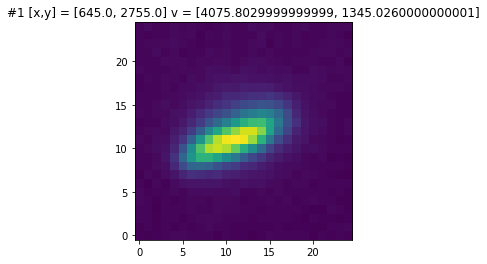

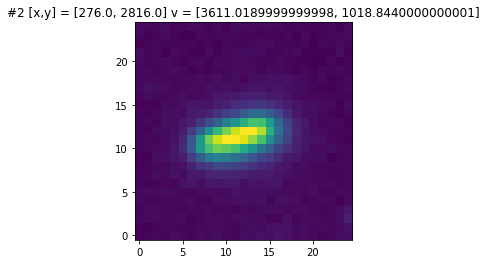

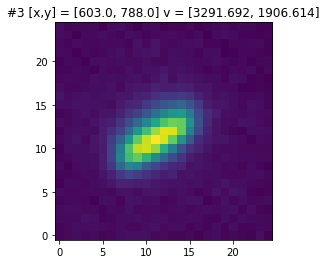

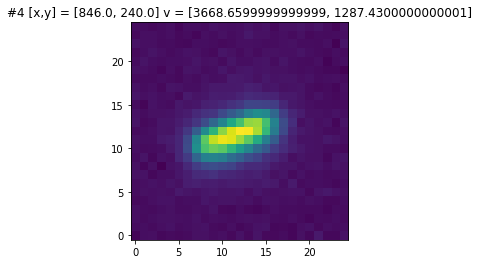

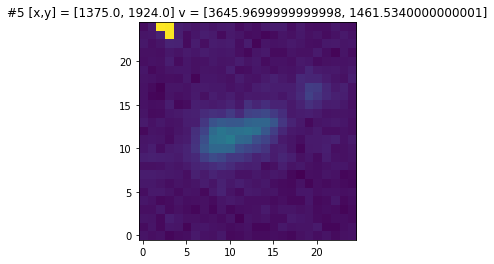

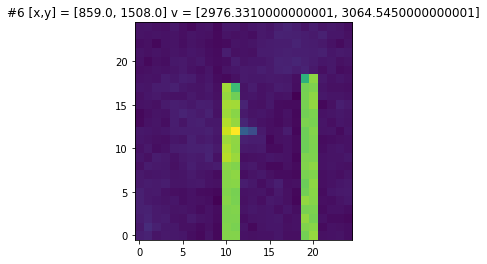

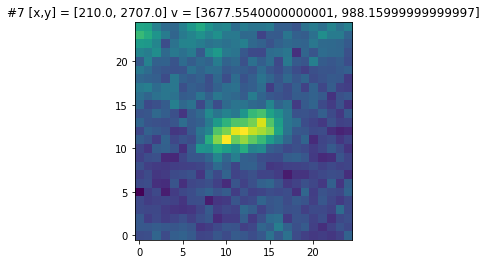

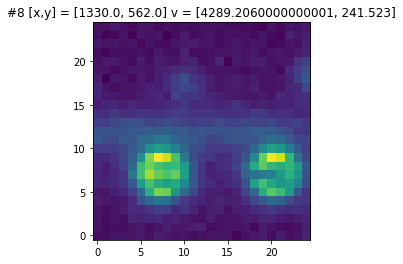

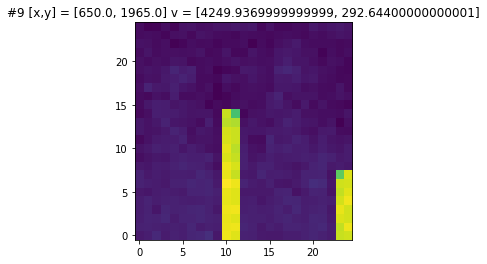

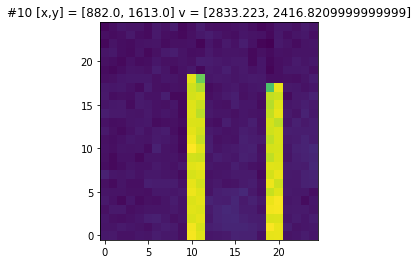

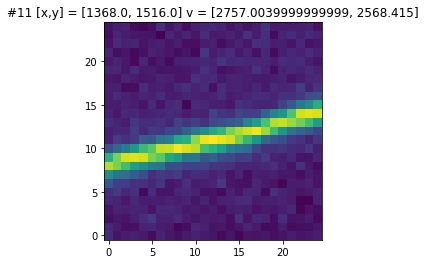

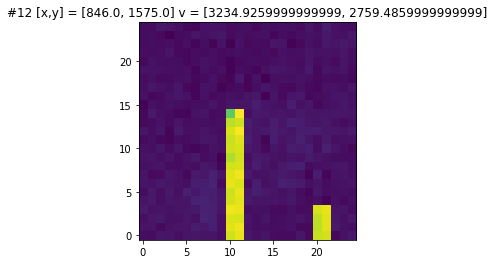

In [34]:
f_results = filtered_results#clustered_results
for imNum in range(min(len(f_results),50)):
    current = imNum#best_targets[imNum]
    try:
        plt.imshow(ai.createPostageStamp(im_array,
                                         list(f_results[['t0_x', 't0_y']][current]),
                                         np.array(list(f_results[['v_x', 'v_y']][current])),
                                         image_times, 
                                         [25., 25.])[0],
                    origin='lower',
               #cmap=plt.cm.Greys_r,
               interpolation='None')
        plt.title(str('#' + str(imNum+1) + ' [x,y] = ' + str(list(f_results[['t0_x', 't0_y']][current])))
                  + ' v = ' + str(list(f_results[['v_x', 'v_y']][current])))
 #   plt.savefig("stamps/stamp"+str(imNum+1)+".png")
        plt.show()
    except:
        print( "oh no" )


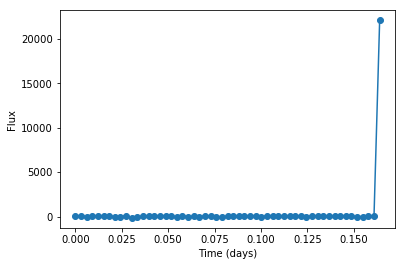

In [43]:
ai.plotLightCurves(im_array, f_results[9], image_times)
plt.show()

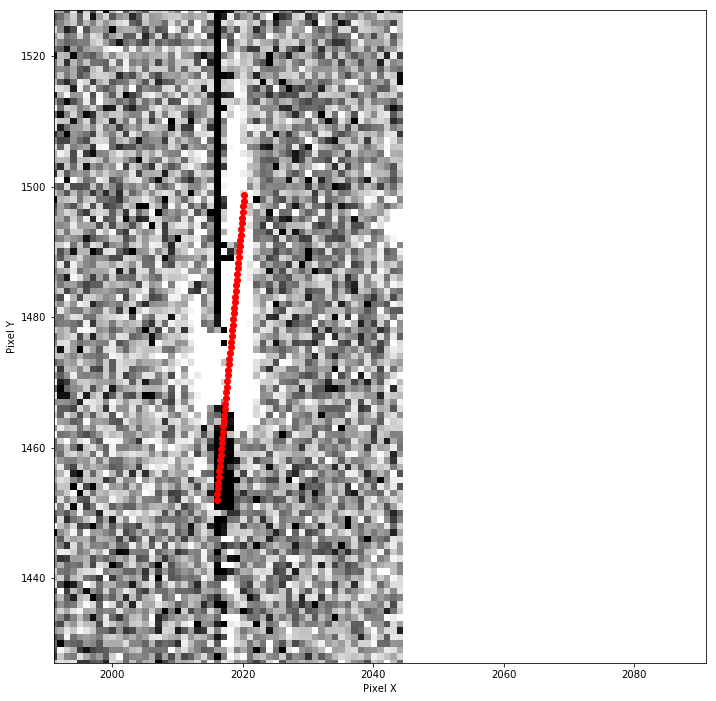

In [117]:
 fig = plt.figure(figsize=(12,12))
ax = ai.plotTrajectory(f_results[4], 
                        image_times, im_array[0], im_plot_args={'vmin':-111, 'vmax':111})
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()